# Hauptkomponentenanalyse PCA

#### Was ist PCA?
- PCA ist ein Verfahren zur Dimensionenreduktion, das Daten auf Hauptkomponenten projiziert, die die maximale Varianz erklären.
- Ziel: Komplexe Datensätze vereinfachen, wesentliche Muster identifizieren und Redundanz reduzieren.

#### Warum PCA für DSC-Messwerte (Differential Scanning Calorimetry)?
- **Reduktion von Datenpunkten:** DSC-Kurven enthalten viele Messpunkte (z. B. über Temperaturen), PCA reduziert diese auf wenige aussagekräftige Hauptkomponenten.
- **Vergleich von Kurvenformen:** Ähnliche Wärmeflusskurven werden in den Hauptkomponentenräumen gruppiert, Unterschiede werden hervorgehoben.
- **Visualisierung:** PCA ermöglicht die Darstellung der Ähnlichkeit/Differenz von DSC-Kurven in 2D- oder 3D-Räumen.
- **Erkennung von Mustern:** PCA hilft, systematische Unterschiede zwischen Materialien oder Proben zu identifizieren.

## 1) Einlesen der Daten

In [1]:
file_path = "../data/030_dsc_experiments.csv"

In [2]:
import pandas as pd
import numpy as np

# Einlesen der CSV-Datei
df_experiments = pd.read_csv(file_path, index_col=0)
df_experiments

,L001_S3,L001_S5,L002_S3,L002_S5,L003_S3,L003_S5,L004_S3,L004_S5,L005_S3,L005_S5,...,L383_S3,L383_S5,L384_S3,L384_S5,L385_S3,L385_S5,L386_S3,L386_S5,L387_S3,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,-0.21989,0.16598,-0.20426,0.15589,-0.21713,0.15900,-0.19927,0.16244,-0.22834,0.17739,...,-0.18067,0.17461,-0.21344,0.19298,-0.19186,0.18028,-0.20261,0.19231,-0.20920,0.19564
-23,-0.22134,0.16647,-0.20408,0.15648,-0.21732,0.15971,-0.20029,0.16288,-0.22837,0.17797,...,-0.18135,0.17530,-0.21442,0.19361,-0.19282,0.18083,-0.20349,0.19302,-0.21002,0.19661
-22,-0.22069,0.16703,-0.20420,0.15707,-0.21706,0.16041,-0.20056,0.16350,-0.22794,0.17882,...,-0.18193,0.17578,-0.21536,0.19430,-0.19367,0.18136,-0.20438,0.19379,-0.21093,0.19738
-21,-0.22040,0.16769,-0.20415,0.15773,-0.21713,0.16099,-0.20061,0.16419,-0.22836,0.17962,...,-0.18263,0.17655,-0.21599,0.19511,-0.19413,0.18202,-0.20510,0.19448,-0.21164,0.19795
-20,-0.22059,0.16849,-0.20421,0.15857,-0.21691,0.16159,-0.20101,0.16484,-0.22840,0.18030,...,-0.18334,0.17710,-0.21663,0.19593,-0.19459,0.18269,-0.20588,0.19512,-0.21252,0.19866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,-0.14800,0.30041,-0.15145,0.28398,-0.15596,0.29227,-0.16994,0.29114,-0.17889,0.31237,...,-0.20089,0.34542,-0.19769,0.42751,-0.21116,0.35646,-0.21207,0.38997,-0.21226,0.41070
271,-0.14738,0.30087,-0.14924,0.28462,-0.15565,0.29285,-0.16835,0.29161,-0.17823,0.31277,...,-0.20402,0.34589,-0.19540,0.42880,-0.21123,0.35731,-0.21093,0.39048,-0.21260,0.41161
272,-0.14694,0.30134,-0.14925,0.28520,-0.15352,0.29349,-0.16734,0.29197,-0.17898,0.31313,...,-0.20251,0.34632,-0.19537,0.42980,-0.21137,0.35797,-0.21101,0.39123,-0.21037,0.41242


## 2) Filtern der relevanten Daten (Segment "_S5")

In [3]:
# Filtern der Spalten, die "_S5" enthalten (Segment 5 "Erhitzen")
columns_s5 = [col for col in df_experiments.columns if "_S5" in col]
df_heating = df_experiments[columns_s5]
df_heating

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,0.16598,0.15589,0.15900,0.16244,0.17739,0.15898,0.19158,0.12865,0.16992,0.15554,...,0.18864,0.17923,0.16501,0.17974,0.19352,0.17461,0.19298,0.18028,0.19231,0.19564
-23,0.16647,0.15648,0.15971,0.16288,0.17797,0.15965,0.19234,0.12905,0.17126,0.15602,...,0.18901,0.17957,0.16534,0.18038,0.19412,0.17530,0.19361,0.18083,0.19302,0.19661
-22,0.16703,0.15707,0.16041,0.16350,0.17882,0.16053,0.19321,0.12990,0.17218,0.15668,...,0.18936,0.17976,0.16552,0.18118,0.19484,0.17578,0.19430,0.18136,0.19379,0.19738
-21,0.16769,0.15773,0.16099,0.16419,0.17962,0.16126,0.19418,0.13042,0.17261,0.15750,...,0.18964,0.18014,0.16566,0.18214,0.19572,0.17655,0.19511,0.18202,0.19448,0.19795
-20,0.16849,0.15857,0.16159,0.16484,0.18030,0.16198,0.19513,0.13134,0.17323,0.15821,...,0.19009,0.18050,0.16584,0.18279,0.19643,0.17710,0.19593,0.18269,0.19512,0.19866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.30041,0.28398,0.29227,0.29114,0.31237,0.29696,0.35333,0.24355,0.29402,0.27868,...,0.32401,0.28104,0.23809,0.38291,0.40321,0.34542,0.42751,0.35646,0.38997,0.41070
271,0.30087,0.28462,0.29285,0.29161,0.31277,0.29735,0.35370,0.24381,0.29462,0.27920,...,0.32388,0.28115,0.23848,0.38371,0.40416,0.34589,0.42880,0.35731,0.39048,0.41161
272,0.30134,0.28520,0.29349,0.29197,0.31313,0.29766,0.35416,0.24410,0.29504,0.27958,...,0.32438,0.28137,0.23848,0.38417,0.40468,0.34632,0.42980,0.35797,0.39123,0.41242


## 3) Normalisierung der Daten

In [4]:
from sklearn.preprocessing import StandardScaler

# Normalisierung der Daten
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_heating)

# Umwandlung zurück in ein DataFrame
df_heating_normalized = pd.DataFrame(data_normalized, columns=df_heating.columns, index=df_heating.index)
df_heating_normalized

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,-1.895041,-1.897818,-1.855503,-1.765930,-1.863076,-1.827870,-1.660864,-1.416342,-1.426349,-1.434633,...,-1.715853,-1.801938,-1.827286,-1.744524,-1.678665,-1.750991,-1.644064,-1.744776,-1.698102,-1.683924
-23,-1.882417,-1.881884,-1.836973,-1.754211,-1.848531,-1.811597,-1.647737,-1.408902,-1.401805,-1.425468,...,-1.706779,-1.791030,-1.812395,-1.733745,-1.668887,-1.737117,-1.634867,-1.734210,-1.685843,-1.668554
-22,-1.867989,-1.865950,-1.818703,-1.737699,-1.827214,-1.790222,-1.632710,-1.393094,-1.384954,-1.412866,...,-1.698195,-1.784934,-1.804272,-1.720271,-1.657155,-1.727466,-1.624793,-1.724028,-1.672547,-1.656353
-21,-1.850984,-1.848126,-1.803566,-1.719323,-1.807151,-1.772491,-1.615955,-1.383423,-1.377078,-1.397210,...,-1.691328,-1.772742,-1.797954,-1.704102,-1.642815,-1.711984,-1.612968,-1.711348,-1.660633,-1.647321
-20,-1.830373,-1.825441,-1.787906,-1.702012,-1.790098,-1.755003,-1.599546,-1.366312,-1.365722,-1.383654,...,-1.680292,-1.761191,-1.789831,-1.693154,-1.631245,-1.700925,-1.600997,-1.698476,-1.649582,-1.636070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,1.568443,1.561448,1.622739,1.661635,1.521990,1.523536,1.133003,0.720599,0.846721,0.916509,...,1.604126,1.464555,1.470569,1.677439,1.738354,1.683449,1.779895,1.639878,1.714896,1.723827
271,1.580295,1.578732,1.637877,1.674152,1.532021,1.533008,1.139394,0.725434,0.857711,0.926437,...,1.600937,1.468084,1.488168,1.690913,1.753835,1.692899,1.798728,1.656208,1.723702,1.738247
272,1.592404,1.594396,1.654580,1.683739,1.541049,1.540538,1.147339,0.730828,0.865404,0.933692,...,1.613200,1.475143,1.488168,1.698661,1.762309,1.701545,1.813328,1.668887,1.736652,1.751082


## 4) Transposition der Datenmatrix

In [5]:
# Transposition der Datenmatrix: Proben werden Zeilen
df_basis = df_heating_normalized.T
df_basis

Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,265,266,267,268,269,270,271,272,273,274
L001_S5,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,1.509958,1.521810,1.536238,1.548089,1.557107,1.568443,1.580295,1.592404,1.603225,1.611469
L002_S5,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,1.499333,1.504194,1.506355,1.522558,1.543353,1.561448,1.578732,1.594396,1.609519,1.624643
L003_S5,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,1.572890,1.584374,1.593247,1.605253,1.613344,1.622739,1.637877,1.654580,1.673894,1.689553
L004_S5,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,1.615295,1.625149,1.632073,1.637133,1.646188,1.661635,1.674152,1.683739,1.697854,1.711970
L005_S5,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,1.432962,1.450517,1.469074,1.489137,1.506441,1.521990,1.532021,1.541049,1.548322,1.557099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,-1.750991,-1.737117,-1.727466,-1.711984,-1.700925,-1.687856,-1.672574,-1.657092,-1.643017,-1.628340,...,1.629563,1.639214,1.653088,1.662940,1.670782,1.683449,1.692899,1.701545,1.714413,1.726477
L384_S5,-1.644064,-1.634867,-1.624793,-1.612968,-1.600997,-1.590339,-1.579974,-1.568878,-1.556761,-1.546541,...,1.724126,1.739893,1.750405,1.763544,1.770698,1.779895,1.798728,1.813328,1.822963,1.830263
L385_S5,-1.744776,-1.734210,-1.724028,-1.711348,-1.698476,-1.686181,-1.671004,-1.656788,-1.644300,-1.632582,...,1.588007,1.595692,1.606834,1.618169,1.631809,1.639878,1.656208,1.668887,1.679261,1.676956
L386_S5,-1.698102,-1.685843,-1.672547,-1.660633,-1.649582,-1.638531,-1.621091,-1.607278,-1.599508,-1.586903,...,1.653770,1.668275,1.675872,1.689858,1.707298,1.714896,1.723702,1.736652,1.744940,1.756164


## 5) Reduktion der Dimension mit PCA

In [6]:
# Beispiel-Datensatz: Zeilen = Proben, Spalten = Temperaturen
data = df_basis.values  # Extrahiere die Werte

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduktion auf 2 Dimensionen
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Hinzufügen der PCA-Komponenten zum DataFrame
df_basis["PCA1"] = pca_result[:, 0]
df_basis["PCA2"] = pca_result[:, 1]
df_basis

Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,267,268,269,270,271,272,273,274,PCA1,PCA2
L001_S5,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,1.536238,1.548089,1.557107,1.568443,1.580295,1.592404,1.603225,1.611469,-7.216422,-2.024340
L002_S5,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,1.506355,1.522558,1.543353,1.561448,1.578732,1.594396,1.609519,1.624643,-7.686041,-1.229176
L003_S5,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,1.593247,1.605253,1.613344,1.622739,1.637877,1.654580,1.673894,1.689553,-7.567047,-1.720351
L004_S5,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,1.632073,1.637133,1.646188,1.661635,1.674152,1.683739,1.697854,1.711970,-8.123176,-1.010625
L005_S5,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,1.469074,1.489137,1.506441,1.521990,1.532021,1.541049,1.548322,1.557099,-7.139745,-2.001867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,-1.750991,-1.737117,-1.727466,-1.711984,-1.700925,-1.687856,-1.672574,-1.657092,-1.643017,-1.628340,...,1.653088,1.662940,1.670782,1.683449,1.692899,1.701545,1.714413,1.726477,-9.339763,1.865182
L384_S5,-1.644064,-1.634867,-1.624793,-1.612968,-1.600997,-1.590339,-1.579974,-1.568878,-1.556761,-1.546541,...,1.750405,1.763544,1.770698,1.779895,1.798728,1.813328,1.822963,1.830263,-9.528098,1.940966
L385_S5,-1.744776,-1.734210,-1.724028,-1.711348,-1.698476,-1.686181,-1.671004,-1.656788,-1.644300,-1.632582,...,1.606834,1.618169,1.631809,1.639878,1.656208,1.668887,1.679261,1.676956,-9.048770,1.181946
L386_S5,-1.698102,-1.685843,-1.672547,-1.660633,-1.649582,-1.638531,-1.621091,-1.607278,-1.599508,-1.586903,...,1.675872,1.689858,1.707298,1.714896,1.723702,1.736652,1.744940,1.756164,-9.254760,1.390317


## 6) Visualisierung der PCA-Ergebnisse

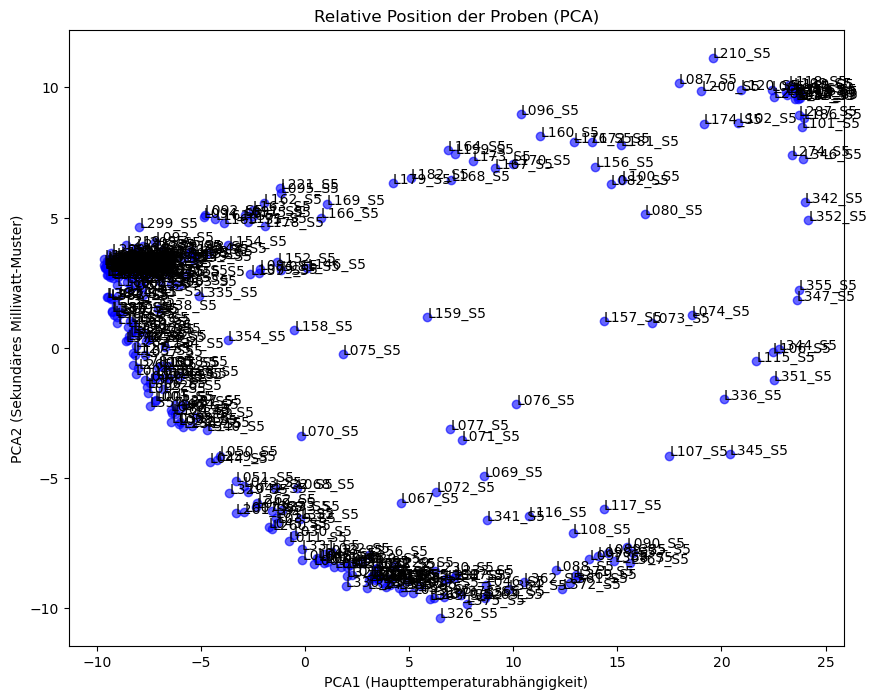

In [8]:
# 7) Visualisierung der PCA-Ergebnisse
plt.figure(figsize=(10, 8))
plt.scatter(df_basis["PCA1"], df_basis["PCA2"], c='blue', alpha=0.6)
plt.title("Relative Position der Proben (PCA)")
plt.xlabel("PCA1 (Haupttemperaturabhängigkeit)")
plt.ylabel("PCA2 (Sekundäres Milliwatt-Muster)")

# Beschriftung der Punkte mit den Probenbezeichnungen
for i, txt in enumerate(df_basis.index):
    plt.annotate(txt, (df_basis["PCA1"].iloc[i], df_basis["PCA2"].iloc[i]))

plt.show()

## 7) Export als CSV

In [9]:
df_basis.index = df_basis.index.astype(str).str.replace('_S5', '', regex=False)
df_basis

Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,267,268,269,270,271,272,273,274,PCA1,PCA2
L001,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,1.536238,1.548089,1.557107,1.568443,1.580295,1.592404,1.603225,1.611469,-7.216422,-2.024340
L002,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,1.506355,1.522558,1.543353,1.561448,1.578732,1.594396,1.609519,1.624643,-7.686041,-1.229176
L003,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,1.593247,1.605253,1.613344,1.622739,1.637877,1.654580,1.673894,1.689553,-7.567047,-1.720351
L004,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,1.632073,1.637133,1.646188,1.661635,1.674152,1.683739,1.697854,1.711970,-8.123176,-1.010625
L005,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,1.469074,1.489137,1.506441,1.521990,1.532021,1.541049,1.548322,1.557099,-7.139745,-2.001867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383,-1.750991,-1.737117,-1.727466,-1.711984,-1.700925,-1.687856,-1.672574,-1.657092,-1.643017,-1.628340,...,1.653088,1.662940,1.670782,1.683449,1.692899,1.701545,1.714413,1.726477,-9.339763,1.865182
L384,-1.644064,-1.634867,-1.624793,-1.612968,-1.600997,-1.590339,-1.579974,-1.568878,-1.556761,-1.546541,...,1.750405,1.763544,1.770698,1.779895,1.798728,1.813328,1.822963,1.830263,-9.528098,1.940966
L385,-1.744776,-1.734210,-1.724028,-1.711348,-1.698476,-1.686181,-1.671004,-1.656788,-1.644300,-1.632582,...,1.606834,1.618169,1.631809,1.639878,1.656208,1.668887,1.679261,1.676956,-9.048770,1.181946
L386,-1.698102,-1.685843,-1.672547,-1.660633,-1.649582,-1.638531,-1.621091,-1.607278,-1.599508,-1.586903,...,1.675872,1.689858,1.707298,1.714896,1.723702,1.736652,1.744940,1.756164,-9.254760,1.390317


In [10]:
df_basis.to_csv("data/pca_simple.csv", index=True)

## Extra) Normierte Distanz zur mittleren Position

In [11]:
import numpy as np

# Berechnung des Mittelpunkts (durchschnittlicher Wert über alle Proben)
mean_position = np.mean(data, axis=0)

# Berechnung der Distanz jeder Probe zum Mittelpunkt
distances_to_mean = np.linalg.norm(data - mean_position, axis=1)

# Hinzufügen der Distanzen zum DataFrame
df_basis["Distance_To_Mean"] = distances_to_mean

# Ausgabe
df_basis

Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,268,269,270,271,272,273,274,PCA1,PCA2,Distance_To_Mean
L001,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,1.548089,1.557107,1.568443,1.580295,1.592404,1.603225,1.611469,-7.216422,-2.024340,7.730481
L002,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,1.522558,1.543353,1.561448,1.578732,1.594396,1.609519,1.624643,-7.686041,-1.229176,8.026661
L003,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,1.605253,1.613344,1.622739,1.637877,1.654580,1.673894,1.689553,-7.567047,-1.720351,8.120358
L004,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,1.637133,1.646188,1.661635,1.674152,1.683739,1.697854,1.711970,-8.123176,-1.010625,8.750576
L005,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,1.489137,1.506441,1.521990,1.532021,1.541049,1.548322,1.557099,-7.139745,-2.001867,7.635839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383,-1.750991,-1.737117,-1.727466,-1.711984,-1.700925,-1.687856,-1.672574,-1.657092,-1.643017,-1.628340,...,1.662940,1.670782,1.683449,1.692899,1.701545,1.714413,1.726477,-9.339763,1.865182,10.201761
L384,-1.644064,-1.634867,-1.624793,-1.612968,-1.600997,-1.590339,-1.579974,-1.568878,-1.556761,-1.546541,...,1.763544,1.770698,1.779895,1.798728,1.813328,1.822963,1.830263,-9.528098,1.940966,10.671785
L385,-1.744776,-1.734210,-1.724028,-1.711348,-1.698476,-1.686181,-1.671004,-1.656788,-1.644300,-1.632582,...,1.618169,1.631809,1.639878,1.656208,1.668887,1.679261,1.676956,-9.048770,1.181946,9.705896
L386,-1.698102,-1.685843,-1.672547,-1.660633,-1.649582,-1.638531,-1.621091,-1.607278,-1.599508,-1.586903,...,1.689858,1.707298,1.714896,1.723702,1.736652,1.744940,1.756164,-9.254760,1.390317,10.099364
